In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import data from csv, drop, unused columns
april = pd.read_csv('/content/April 2023 Tracking - Sheet1.csv')
april.drop(['# brusque retortions','pther'], axis = 1, inplace = True)
april.replace('NA', None) #replace NA values from the google sheet with actualy python NaN values
# renaming some columns because they are long or incorrect
april.rename(columns = {'2': 'Dates', 'Meditation (optional for April)': 'Meditation'}, inplace = True)

# I forgot to record for the 29th and the 30th, so I am getting rid of those rows:
april.drop(april.tail(2).index, axis = 0, inplace = True)
# show the start of the data (note many NaN values appear becasue some things were only beginning to be recorded later in the month)
april.head()

,Dates,Phone Screen Time,#Outlook Checks,#Gmail Checks,Fitness yes/no?,Rem yes/no?,Morn 1/2hr,Night 1/2 Hr,Journal 10 min,#Snapchat Checks,Wake By 8am?,Meditation,Impulse buy (yes/no)
0,April 2,176,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,April 3,128,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April 4,98,4.0,4.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN
3,April 5,110,4.0,3.0,0.0,0.0,0.5,1.0,1.0,NaN,NaN,NaN,NaN
4,April 6,194,3.0,2.0,1.0,0.5,1.0,0.0,1.0,NaN,NaN,NaN,NaN


In [3]:
# make a dataframe with rolling averages to that the trends can be smoothed out over time
# argument min_periods = 1 makes it so that, even though the avergae is USUALLY of 5 values, the table will still compute something if one or more of those 5 are NaN values
# (this avoids having a lot of Nan vals)
april_rolling_avg = april.rolling(5, min_periods = 1, center = True).mean()
april_rolling_avg.head()

<ipython-input-3-f19651a3fc55>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Dates'], dtype='object')
  april_rolling_avg = april.rolling(5, min_periods = 1, center = True).mean()


,Phone Screen Time,#Outlook Checks,#Gmail Checks,Fitness yes/no?,Rem yes/no?,Morn 1/2hr,Night 1/2 Hr,Journal 10 min,#Snapchat Checks,Wake By 8am?,Meditation,Impulse buy (yes/no)
0,134.0,4.00,3.00,0.500000,0.666667,0.000,1.000000,1.0,NaN,NaN,NaN,NaN
1,128.0,4.00,3.00,0.333333,0.500000,0.250,1.000000,1.0,NaN,NaN,NaN,NaN
2,141.2,3.75,2.75,0.500000,0.500000,0.500,0.666667,1.0,NaN,NaN,NaN,NaN
3,135.8,3.40,2.40,0.600000,0.300000,0.625,0.750000,1.0,NaN,NaN,NaN,NaN
4,136.0,2.80,2.20,0.400000,0.100000,0.700,0.800000,1.0,NaN,NaN,NaN,NaN


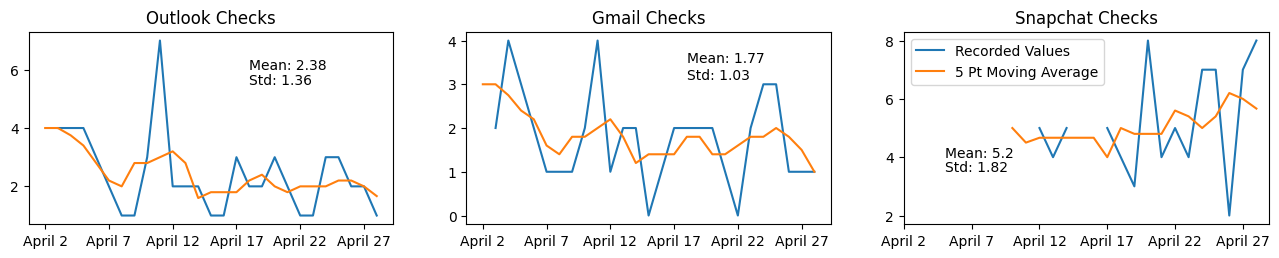

In [4]:
# now making a ton of moving average vs regular data plots!!!
# I briefly describe what each plot means and my goals for them in May (2023)

# first cell: plotting the amount I've checked my two different emails and snapchat each day. 
# My goal was to check each email on average 3 times a day
# since I barely checked my email on weekends and it seemed linger around 2 or 3 otherwise, the average turned out quite well.

# I didn't set a specific goal for snapchat usage, and as can be seen from the plot, I only deicded to start recording it halfway through the month
# I see the snapchat trend generally increasing, so I was concerned by this. My goal for May will be average <4 checks per day

dates = april['Dates']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,2.5))

ax1.plot(dates, april['#Outlook Checks'], label = 'Recorded Values')
ax1.plot(dates, april_rolling_avg['#Outlook Checks'], label = 'Moving Average')
ax1.title.set_text('Outlook Checks')
# print mean and std on the graph (change the first two value to position differently)
ax1.text(16, 6, f'Mean: {april["#Outlook Checks"].mean().round(2)}', fontsize = 10)
ax1.text(16, 5.5, f'Std: {april["#Outlook Checks"].std().round(2)}', fontsize = 10)

ax2.plot(dates, april['#Gmail Checks'], label = 'Recorded Values')
ax2.plot(dates, april_rolling_avg['#Gmail Checks'], label = '5 Pt Moving Average')
ax2.title.set_text('Gmail Checks')
ax2.text(16, 3.5, f'Mean: {april["#Gmail Checks"].mean().round(2)}', fontsize = 10)
ax2.text(16, 3.1, f'Std: {april["#Gmail Checks"].std().round(2)}', fontsize = 10)

ax3.plot(dates, april['#Snapchat Checks'], label = 'Recorded Values')
ax3.plot(dates, april_rolling_avg['#Snapchat Checks'], label = '5 Pt Moving Average')
ax3.title.set_text('Snapchat Checks')
ax3.text(3, 4, f'Mean: {april["#Snapchat Checks"].mean().round(2)}', fontsize = 10)
ax3.text(3, 3.5, f'Std: {april["#Snapchat Checks"].std().round(2)}', fontsize = 10)

# set number of ticks on x-axis
ax1.set_xticks(range(0, len(dates), 5))
ax2.set_xticks(range(0, len(dates), 5))
ax3.set_xticks(range(0, len(dates), 5))

plt.legend(loc = 2) #legend goes in the top left, to see the graph best
plt.show()
# plt.plot(april['Phone Screen Time'])
# plt.plot

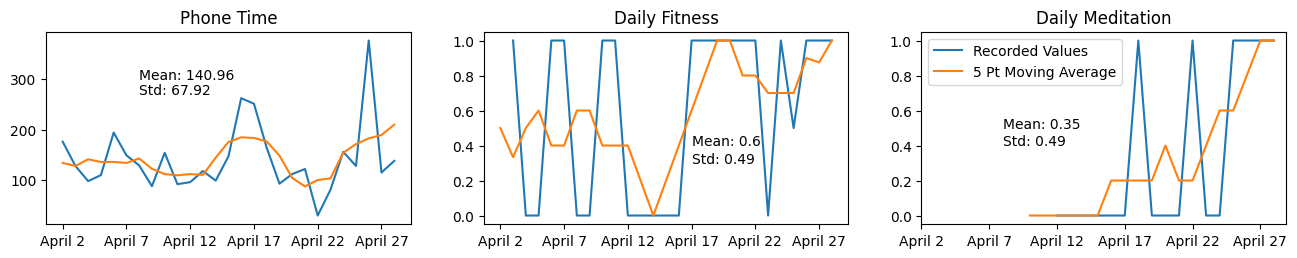

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,2.5))

# based ont he pltos and avlues, i spend an averga eof 2hr 2 mins on my phone each day
# I don't think this is necessarily bad since something I am using my phone for good things (i.e. making dance choreography, coordinating stuff with friends, zoom meetings)
# but there are some days that are especially poor, for example if I start watching a lot fo Youtube! (this is responsible for the two very high points during the month)
# I think the average would go non-negligibly further down if I got rid of those points, and it's those points that lead to the greatest loss of productivity
# Hence, my goal for May will be to avoid any phone time over 3.5 hrs (instead of aiming for an average)
ax1.plot(dates, april['Phone Screen Time'], label = 'Recorded Values')
ax1.plot(dates, april_rolling_avg['Phone Screen Time'], label = 'Moving Average')
ax1.title.set_text('Phone Time')
ax1.text(6, 300, f'Mean: {april["Phone Screen Time"].mean().round(2)}', fontsize = 10)
ax1.text(6, 270, f'Std: {april["Phone Screen Time"].std().round(2)}', fontsize = 10)

# to measure my fitness, I gave myself a "1" if I was physically active that day (gym, dancing, yoga, slacklining, etc)
# For days where I predict I won't have access to a typical fitness acitivity, I try to do at least 50 pushups and give myself 0.5
# If I do neither, I get a 0

# not too much to say about my fitness; I think it's improving given the general trend, adn I'd like to try to keep this up
# I'll aim for an average of 0.7 for May
ax2.plot(dates, april['Fitness yes/no?'], label = 'Recorded Values')
ax2.plot(dates, april_rolling_avg['Fitness yes/no?'], label = 'Moving Average')
ax2.title.set_text('Daily Fitness')
ax2.text(15, 0.4, f'Mean: {april["Fitness yes/no?"].mean().round(2)}', fontsize = 10)
ax2.text(15, 0.3, f'Std: {april["Fitness yes/no?"].std().round(2)}', fontsize = 10)

# I only started recording whether ot not I mediated near the end of the month
# My May resolution is to build up a habit of daily meditation, so my goal is for this avergae to be >0.9
ax3.plot(dates, april['Meditation'], label = 'Recorded Values')
ax3.plot(dates, april_rolling_avg['Meditation'], label = '5 Pt Moving Average')
ax3.title.set_text('Daily Meditation')
ax3.text(6, 0.5, f'Mean: {april["Meditation"].mean().round(2)}', fontsize = 10)
ax3.text(6, 0.4, f'Std: {april["Meditation"].std().round(2)}', fontsize = 10)

# set number of ticks on x-axis
ax1.set_xticks(range(0, len(dates), 5))
ax2.set_xticks(range(0, len(dates), 5))
ax3.set_xticks(range(0, len(dates), 5))

plt.legend(loc = 2) #legend goes in the top left of this one
plt.show()

In [6]:
print(april.keys())

Index(['Dates', 'Phone Screen Time', '#Outlook Checks', '#Gmail Checks',
       'Fitness yes/no?', 'Rem yes/no?', 'Morn 1/2hr', 'Night 1/2 Hr',
       'Journal 10 min', '#Snapchat Checks', 'Wake By 8am?', 'Meditation',
       'Impulse buy (yes/no)'],
      dtype='object')


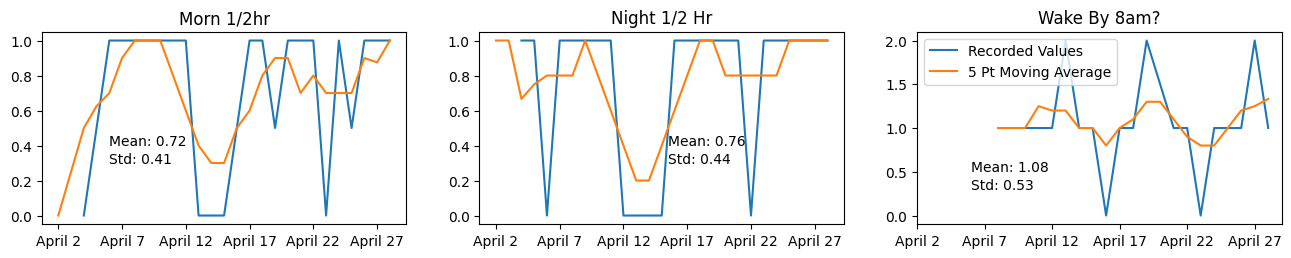

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,2.5))

# This is whether I avoid checking my phone for the first 1/2 hour of each day
# was one of the first things I started to trying to do on a regular basis and I highly recommend it! Get's the day started right and 
# forces me to do other (much more useful) things, like breakfast, packing my bag, showering, etc)
# this average shows that about 75% of the time I was able to do this
# My goal for May will by 0.8 or higher mean
ax1.plot(dates, april['Morn 1/2hr'], label = 'Recorded Values')
ax1.plot(dates, april_rolling_avg['Morn 1/2hr'], label = 'Moving Average')
ax1.title.set_text('Morn 1/2hr')
ax1.text(4, 0.4, f'Mean: {april["Morn 1/2hr"].mean().round(2)}', fontsize = 10)
ax1.text(4, 0.3, f'Std: {april["Morn 1/2hr"].std().round(2)}', fontsize = 10)

# Very similarly, this is whether I avoid checking my phone for the LAST 1/2 hour of each day
# This is also great for preparing for bed, and doing things that I would otherwise avoid for that day (like meditating, journalling, reading, or doing dishes!)
ax2.plot(dates, april['Night 1/2 Hr'], label = 'Recorded Values')
ax2.plot(dates, april_rolling_avg['Night 1/2 Hr'], label = 'Moving Average')
ax2.title.set_text('Night 1/2 Hr')
ax2.text(13.5, 0.4, f'Mean: {april["Night 1/2 Hr"].mean().round(2)}', fontsize = 10)
ax2.text(13.5, 0.3, f'Std: {april["Night 1/2 Hr"].std().round(2)}', fontsize = 10)

# The last plot here was if I was able to wake by *am on any given day (1 if so, 0 if not)
# I also gave myself "bonus" points by increasing the score I gave myself for every hour earlier than 8 I was able to wake that day (i.e. waking by 7 = 1.5, by 6 = 2, etc.)
# I am proud that there were only two exceptions to this for April (during the time that I was recoridng this info), meaning I woke up by 8 almost every day of this month

# I would love to start getting up a little earlier to have more time to set myself up for the day before my classes start, and hope to have this average be 1.5 in May
ax3.plot(dates, april['Wake By 8am?'], label = 'Recorded Values')
ax3.plot(dates, april_rolling_avg['Wake By 8am?'], label = '5 Pt Moving Average')
ax3.title.set_text('Wake By 8am?')
ax3.text(4, 0.5, f'Mean: {april["Wake By 8am?"].mean().round(2)}', fontsize = 10)
ax3.text(4, 0.3, f'Std: {april["Wake By 8am?"].std().round(2)}', fontsize = 10)

# set number of ticks on x-axis
ax1.set_xticks(range(0, len(dates), 5))
ax2.set_xticks(range(0, len(dates), 5))
ax3.set_xticks(range(0, len(dates), 5))

plt.legend(loc = 2) #legend goes in the top left of this one
plt.show()

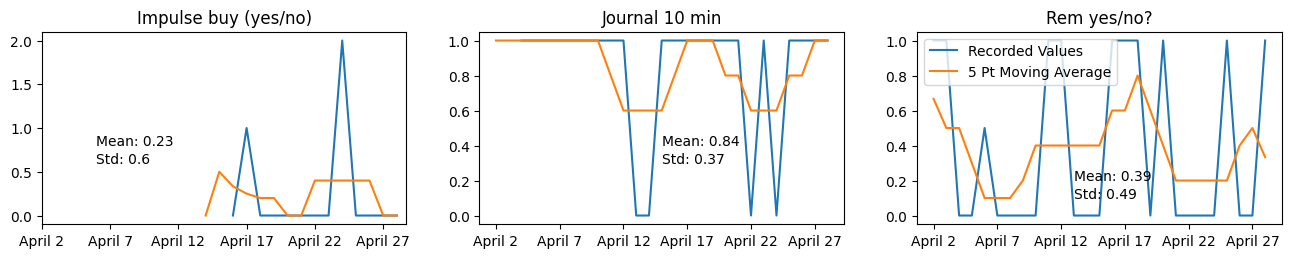

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,2.5))

# "Impulse Buy" simply measures whether I spent money on something I did not intend/expect to spend money on (1 if yes, otherwise 0) (the goal is a low value for this metric)
# for example, a coffee or snack I didn't need, fast food lunch when I brought my own, an article fo clothing that was unecessary, etc.
# I also gave myself a 2, fi I every spent money on things larger than $25 without premeditating on it
# I only started recording this late in the month of april
# In the future, I want this to occur less than once a week, so my goal for May is for this value to be < 0.14 ~= (1/7)
ax1.plot(dates, april['Impulse buy (yes/no)'], label = 'Recorded Values')
ax1.plot(dates, april_rolling_avg['Impulse buy (yes/no)'], label = 'Moving Average')
ax1.title.set_text('Impulse buy (yes/no)')
ax1.text(4, 0.8, f'Mean: {april["Impulse buy (yes/no)"].mean().round(2)}', fontsize = 10)
ax1.text(4, 0.6, f'Std: {april["Impulse buy (yes/no)"].std().round(2)}', fontsize = 10)

# this is whether I journalled or not; pretty self explanatory; 
# I have a list of prompts I look at to inspire my writing, or sometimes will just write is what is on my mind, reflect on my day, or do some kind of written stoic meditation (negative visualization, last time meditation, etc.)
# journally 84% of the time is something I pretty proud of; however, I definitely started the month out stronger,. and I hope to rekindle this fervor for May. 
# Aiming to keep up the trend and get a vlue >=0.85 for May!
ax2.plot(dates, april['Journal 10 min'], label = 'Recorded Values')
ax2.plot(dates, april_rolling_avg['Journal 10 min'], label = 'Moving Average')
ax2.title.set_text('Journal 10 min')
ax2.text(13, 0.4, f'Mean: {april["Journal 10 min"].mean().round(2)}', fontsize = 10)
ax2.text(13, 0.3, f'Std: {april["Journal 10 min"].std().round(2)}', fontsize = 10)

# Remnote is a software I use for flashcards (studying classes, remembering cool words, reviewing interesting articles I've read in the past, etc.)
# I give myself a 1 if I met my flashcard review goal for the day (usually around 30 cards and around 30 minutes; it's left up to the app to decide exactly how much, and idk the precise algorithm)
# I give myself a 0 otherwise, or a 0.5 If I review at least half of the flashcards for that day.

# This habit is once that has been most sporadic for April, as seen by the graph. 
# I think flashcards are potentially a really good way for me to get better at recalling information that I would otherwise forget,
# so I want to put more effort into this for May;
# my goal is to have a value >=0.6 (practicing all flashcards at least 60% of the days)
ax3.plot(dates, april['Rem yes/no?'], label = 'Recorded Values')
ax3.plot(dates, april_rolling_avg['Rem yes/no?'], label = '5 Pt Moving Average')
ax3.title.set_text('Rem yes/no?')
ax3.text(11, 0.2, f'Mean: {april["Rem yes/no?"].mean().round(2)}', fontsize = 10)
ax3.text(11, 0.1, f'Std: {april["Rem yes/no?"].std().round(2)}', fontsize = 10)

# set number of ticks on x-axis
ax1.set_xticks(range(0, len(dates), 5))
ax2.set_xticks(range(0, len(dates), 5))
ax3.set_xticks(range(0, len(dates), 5))

plt.legend(loc = 2) #legend goes in the top left of this one
plt.show()

In [9]:
# FUTURE WORK (maybe for May):
# How correlated are these different variables? 
# it would be cool to make some correlation plots

# This segueues well into a similar question:
# Can failing/succeeding at one thing (e.g. meditation) allow me to predict (with some amount of accuracy) whether or not I failed/succeeded at another (e.g. journalling)?
# It would be cool to make some naive machine learning model to try this

# Is it possible to causaully determine which of thee variables leads to the most others to occur on a given day? Then, if so, I should focus most on that thing

# given the time series of any 1 variable, can I train a model to predict what the next value will be? Would be cool to make a recurrent NN for this or something 